# Kaggle Titanic Challenge
****

In [1]:
import polars as pl

titanic_df = pl.read_csv('./kaggle/input/titanic/train.csv')
titanic_df.head()

ModuleNotFoundError: No module named 'polars'

### Variable Notes
   - **PassengerId** Unique ID of the passenger

   - **Survived** Survived (1) or died (0)

   - **Pclass** Passenger's class (1st, 2nd, or 3rd)

   - **Name** Passenger's name

   - **Sex** Passenger's sex

   - **Age** Passenger's age

   - **SibSp** Number of siblings/spouses aboard the Titanic

   - **Parch** Number of parents/children aboard the Titanic

   - **Ticket** Ticket number

   - **Fare** Fare paid for ticket

   - **Cabin** Cabin number

   - **Embarked** Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [2]:
# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {titanic_df.shape}\n=================================")
print(f"DataFrame describe : {titanic_df.describe()}\n=================================")
print(f"DataFrame columns : {titanic_df.columns}\n=================================")
print(f"The type of each column : {titanic_df.dtypes}\n=================================")
print(f"How much missing value in every column : {titanic_df.null_count()}\n=================================")

DataFrame shape : (891, 12)
DataFrame describe : shape: (9, 13)
┌────────────┬─────────────┬──────────┬──────────┬───┬───────────┬───────────┬───────┬──────────┐
│ statistic  ┆ PassengerId ┆ Survived ┆ Pclass   ┆ … ┆ Ticket    ┆ Fare      ┆ Cabin ┆ Embarked │
│ ---        ┆ ---         ┆ ---      ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---   ┆ ---      │
│ str        ┆ f64         ┆ f64      ┆ f64      ┆   ┆ str       ┆ f64       ┆ str   ┆ str      │
╞════════════╪═════════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════╪══════════╡
│ count      ┆ 891.0       ┆ 891.0    ┆ 891.0    ┆ … ┆ 891       ┆ 891.0     ┆ 204   ┆ 889      │
│ null_count ┆ 0.0         ┆ 0.0      ┆ 0.0      ┆ … ┆ 0         ┆ 0.0       ┆ 687   ┆ 2        │
│ mean       ┆ 446.0       ┆ 0.383838 ┆ 2.308642 ┆ … ┆ null      ┆ 32.204208 ┆ null  ┆ null     │
│ std        ┆ 257.353842  ┆ 0.486592 ┆ 0.836071 ┆ … ┆ null      ┆ 49.693429 ┆ null  ┆ null     │
│ min        ┆ 1.0         ┆ 0.0      ┆ 1.0      ┆ … ┆

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?

# 1. Who were the passengers on the titanic?

In [3]:
import seaborn as sns

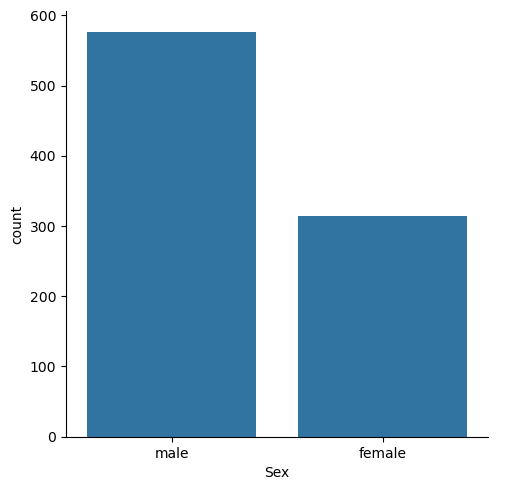

In [4]:
# Let's first check gender
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot(x='Sex', data=titanic_df, kind='count')

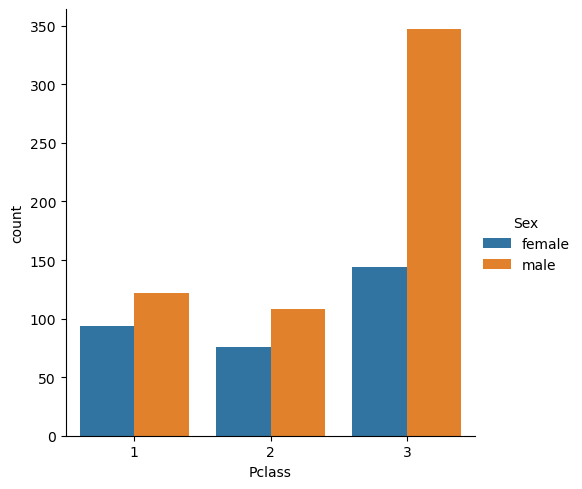

In [5]:
# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')

In [6]:
# Create a new column 'Person' in which every person under 16 is child.

titanic_df = titanic_df.with_columns(
    Person = pl.when(pl.col("Age") < 16)
    .then(pl.lit('Child'))
    .otherwise(pl.col("Sex"))
)

titanic_df

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""male"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""female"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""","""female"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""female"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""male"""
…,…,…,…,…,…,…,…,…,…,…,…,…
887,0,2,"""Montvila, Rev. Juozas""","""male""",27.0,0,0,"""211536""",13.0,null,"""S""","""male"""
888,1,1,"""Graham, Miss. Margaret Edith""","""female""",19.0,0,0,"""112053""",30.0,"""B42""","""S""","""female"""
889,0,3,"""Johnston, Miss. Catherine Hele…","""female""",null,1,2,"""W./C. 6607""",23.45,null,"""S""","""female"""


In [7]:
# Checking the distribution
print(f"Person categories : {titanic_df.select('Person').unique()}\n=================================")
print(f"Distribution of person : {titanic_df.select(pl.col('Person').value_counts())}\n=================================")
print(f"Mean age : {titanic_df.select('Age').mean()}\n=================================")

Person categories : shape: (3, 1)
┌────────┐
│ Person │
│ ---    │
│ str    │
╞════════╡
│ Child  │
│ female │
│ male   │
└────────┘
Distribution of person : shape: (3, 1)
┌────────────────┐
│ Person         │
│ ---            │
│ struct[2]      │
╞════════════════╡
│ {"Child",83}   │
│ {"female",271} │
│ {"male",537}   │
└────────────────┘
Mean age : shape: (1, 1)
┌───────────┐
│ Age       │
│ ---       │
│ f64       │
╞═══════════╡
│ 29.699118 │
└───────────┘


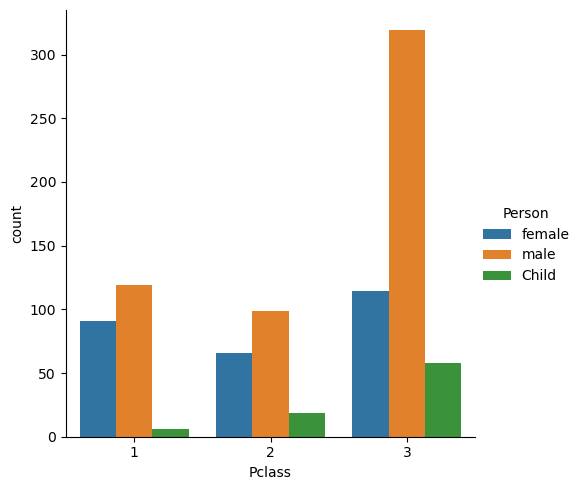

In [8]:
sns.catplot(x='Pclass', data=titanic_df, hue='Person', kind='count')

<Axes: ylabel='Count'>

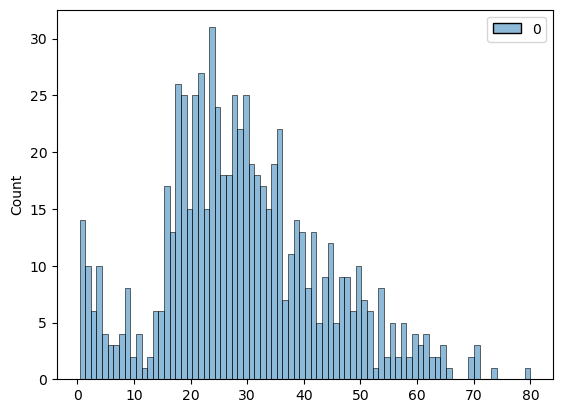

In [9]:
# visualizing age distribution
sns.histplot(titanic_df.select('Age'), bins=80, kde=False)

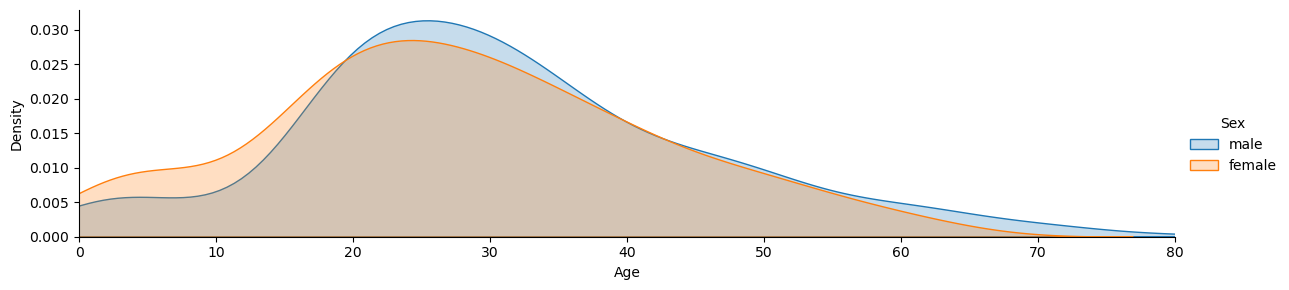

In [10]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

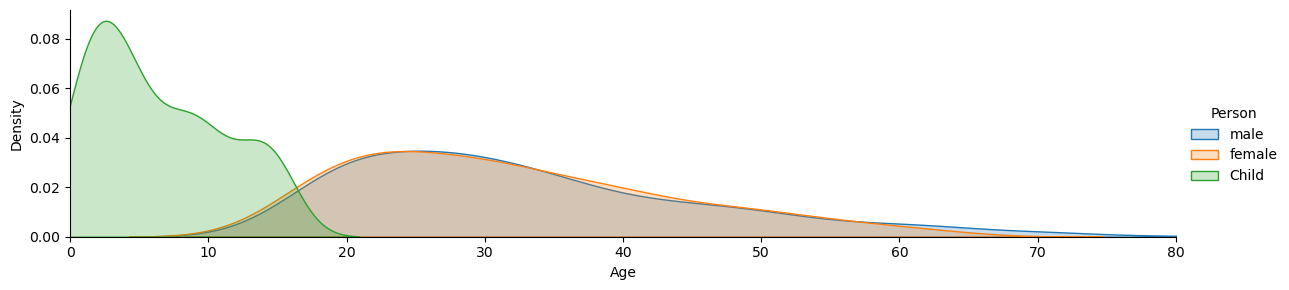

In [11]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

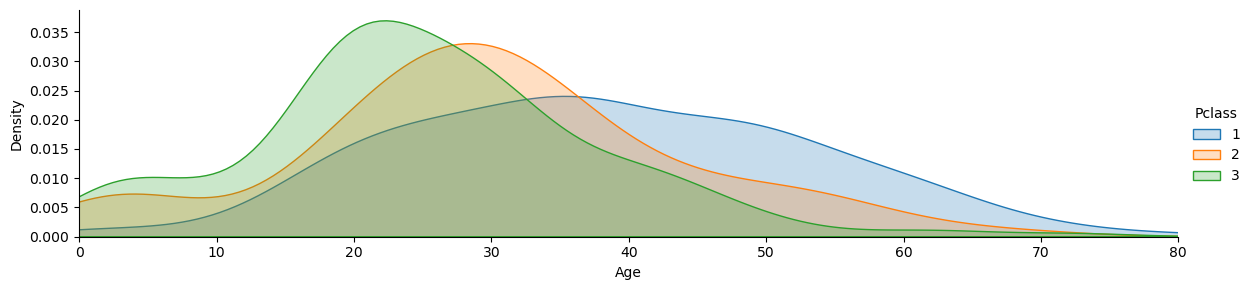

In [12]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

# 2. What deck were the passengers on and how does that relate to their class?

In [13]:
# visualizing the dataset again
titanic_df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""male"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""female"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""","""female"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""female"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""male"""


In [14]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df.select(pl.col('Cabin').drop_nulls())
deck

Cabin
str
"""C85"""
"""C123"""
"""E46"""
"""G6"""
"""C103"""
…
"""D35"""
"""B51 B53 B55"""
"""C50"""


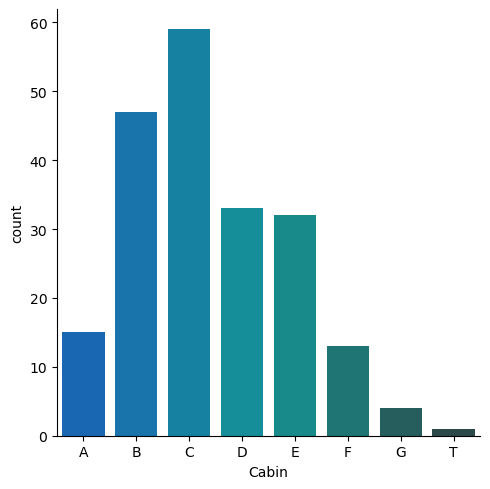

In [15]:
# let's grab that letter for the deck level with a simple for loop
cabin_df = titanic_df.with_columns(
    pl.col('Cabin').str.slice(0, 1).alias('Cabin')
).select('Cabin').drop_nulls().sort('Cabin')

sns.catplot(x='Cabin', data=cabin_df, kind='count', hue='Cabin', palette='winter_d')

Interesting to note we have a 'T' deck value there which doesn't make sense, we  can drop it out with the following code:

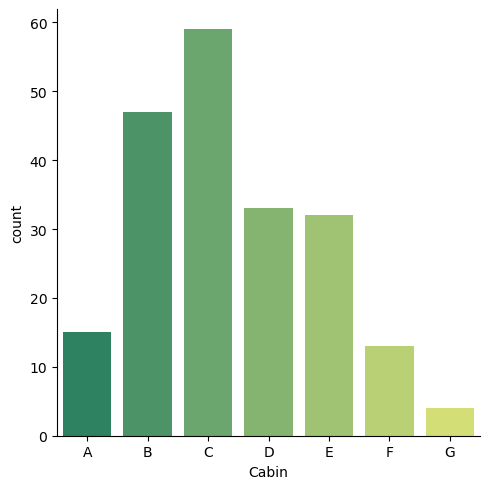

In [16]:
cabin_df = cabin_df.select('Cabin').filter(pl.col('Cabin') != 'T')
sns.catplot(x='Cabin', data=cabin_df, kind='count', hue='Cabin', palette='summer')

# 3. Where did the passengers come from?

In [17]:
titanic_df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""male"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""female"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""","""female"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""female"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""male"""


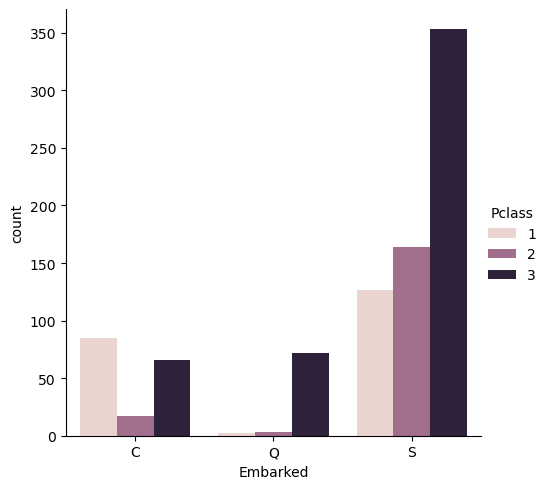

In [18]:
# Now we can make a quick factorplot to check out the results, note the 
# order argument, used to deal with NaN values

sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

# 4. Who was alone and who was with family?

In [19]:
titanic_df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""male"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""female"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""","""female"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""female"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""male"""


In [20]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column
titanic_df = titanic_df.with_columns(
    Alone_Condition = pl.col('SibSp') + pl.col('Parch')
)

# Look for > 0 or == 0 to set alone status
titanic_df = titanic_df.with_columns(
    Alone = pl.when(pl.col('Alone_Condition') > 0)
              .then(pl.lit('with Family'))
              .when(pl.col('Alone_Condition') == 0)
              .then(pl.lit('Alone'))
)

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [21]:
# Let's check to make sure it worked
titanic_df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone_Condition,Alone
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str,i64,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""male""",1,"""with Family"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""female""",1,"""with Family"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""","""female""",0,"""Alone"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""female""",1,"""with Family"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""male""",0,"""Alone"""


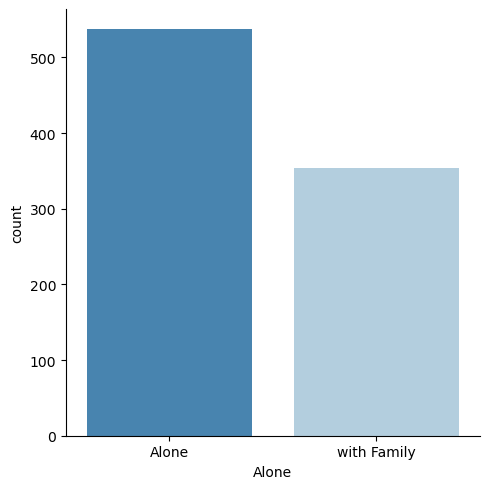

In [22]:
# Now let's get a simple visualization!
sns.catplot(x='Alone', data=titanic_df, kind='count', hue='Alone', palette='Blues', order=['Alone', 'with Family'])

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: *What factors helped someone survive the sinking?*

# 5. What factors helped someone survive the sinking?

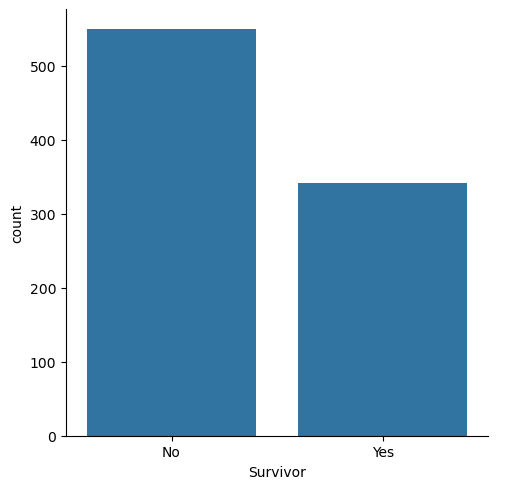

In [23]:
mapping = {0: 'No', 1:'Yes'}
titanic_df = titanic_df.with_columns(
    Survivor = pl.col('Survived').replace_strict(mapping)
)

# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor', data=titanic_df, kind='count')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

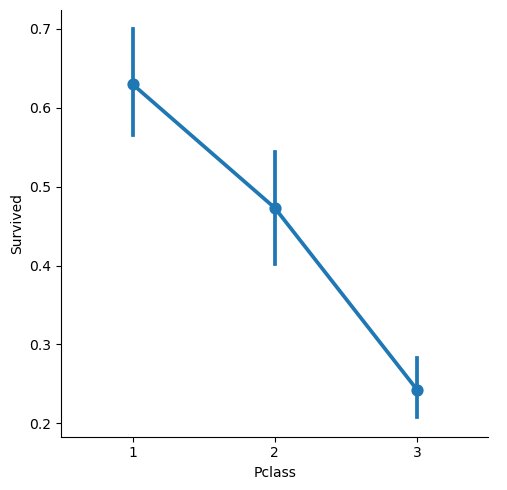

In [24]:
# Let's use a factor plot again, but now considering class
sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind='point')

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

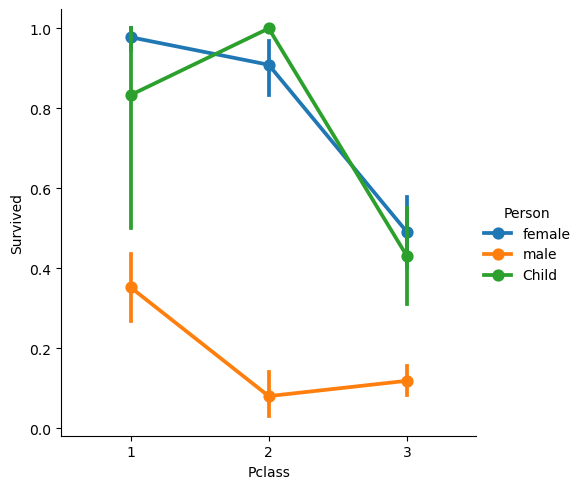

In [25]:
# Let's use a factor plot again, but now considering class and gender
sns.catplot(x='Pclass', y='Survived', data=titanic_df, hue='Person', kind='point')

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

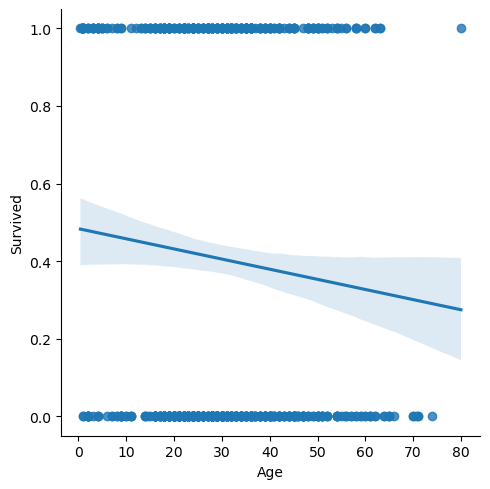

In [26]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age', y='Survived', data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

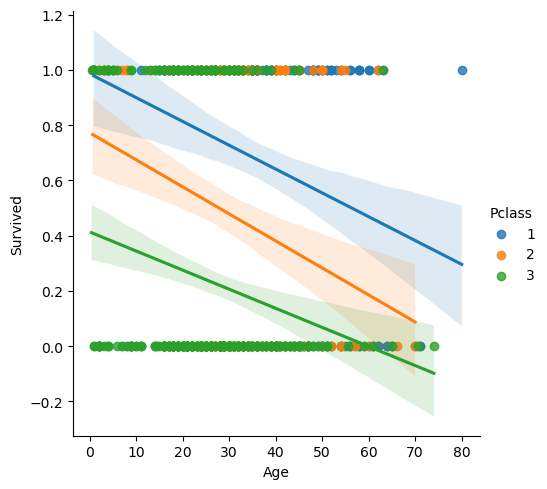

In [27]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age', y='Survived',hue='Pclass', data=titanic_df)

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

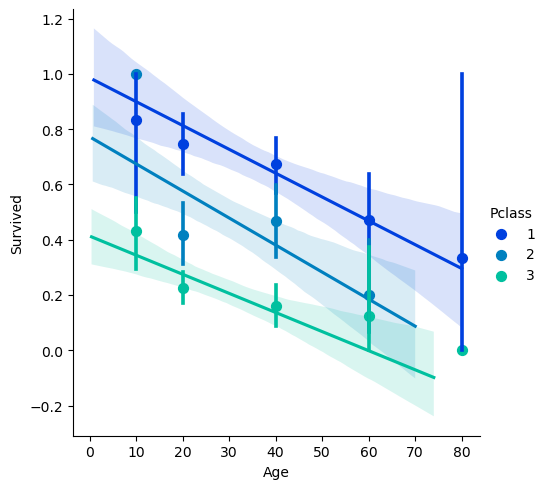

In [28]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations = [10, 20, 40, 60, 80]
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

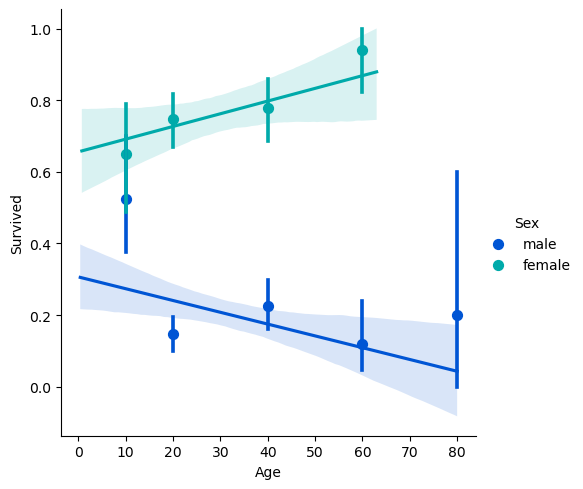

In [29]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)